<center><font size="16" ><b>Pooling with Python</b></font></center>

<img align="center" src="imgs/python.png" width="200"/>

### 1986 911 Turbo (930)

<img src="./imgs/green_911_turbo_86.jpeg" />

In [2]:
# http://localhost:8888/edit/AI_Decomposed.py
from AI_Decomposed import *

### gather metadata - height, width, channel count

In [3]:
image_file = './imgs/green_911_turbo_86.jpeg'
[height, width ,red, green, blue] = image_meta(image_file)

### split out color channels

In [4]:
save_image(red,width,'red_porche.png')
save_image(green,width,'green_porche.png')
save_image(blue,width,'blue_porche.png')

<table align="left">
    <tr align="center"><th>original</th><th>red channel</th><th>green channel</th><th>blue channel</th></tr>
<tr>
<td><img src="./imgs/green_911_turbo_86.jpeg"/> </td>
<td><img src="./imgs/red_porche.png"/> </td>
<td><img src="./imgs/green_porche.png"/></td>
<td><img src="./imgs/blue_porche.png"/></td>
</tr>
</table>

# convolution = a very overloaded term
basically, applying a kernel matrix to a larger matrix to create feature map, aka convolution  

![edge](./imgs/convolution_edge_detect.png)

http://timdettmers.com/2015/03/26/convolution-deep-learning/

![animated](./imgs/animated_convolution.gif)

http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html

###  python - simple pooling example

<img src='imgs/green_golf.jpg' width='400'/>

In [10]:
def apply_kernel(window, filter, i, j):
    sum = 0
    for m in range(len(filter)):
        for n in range(len(filter[m])):
            sum = sum + ((window[i + m][j + n]) * (filter[m][n]))
    return sum

In [11]:
def convolve(matrix, kernel):
    convOut = []
    for i in range(len(matrix) - ((len(kernel)) - 1)):
        r = list()
        for j in range(len(matrix[i]) - ((len(kernel)) - 1)):
            r.append(apply_kernel(matrix, kernel, i, j))
        convOut.append(r)
    return convOut

# kernel

In [12]:
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

# green channel

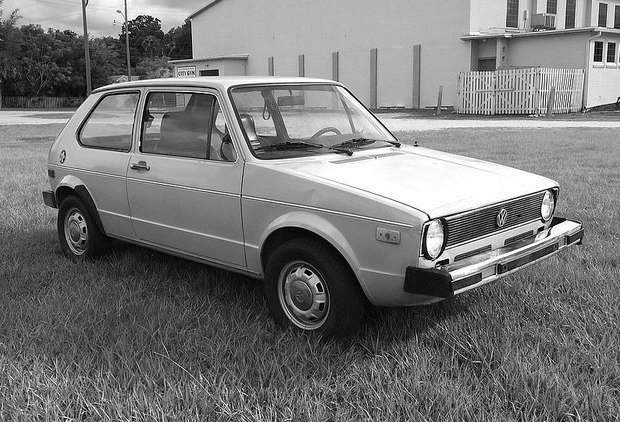

In [13]:
image_file = 'imgs/green_golf.jpg'
[height, width, red, green, blue] = image_meta(image_file)
display_channel(green, width)

# zero padding demo

In [27]:
# create flat list
sample = list(range(16))
print(sample)
print()

# convert to matrix
sample_matrix = np.asarray(sample).reshape(4,4)
print(sample_matrix)
print()

# zero pad matrix
sample_padded = np.pad(sample_matrix, 1, 'constant')
print(sample_padded)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 0  0  0  0  0  0]
 [ 0  0  1  2  3  0]
 [ 0  4  5  6  7  0]
 [ 0  8  9 10 11  0]
 [ 0 12 13 14 15  0]
 [ 0  0  0  0  0  0]]


# zero pad green channel

In [28]:
# convert to matrix
green_array = np.asarray(green).reshape(height,width)
# add zero pad border
green_padded = np.pad(green_array, 1, 'constant')

# perform convolution

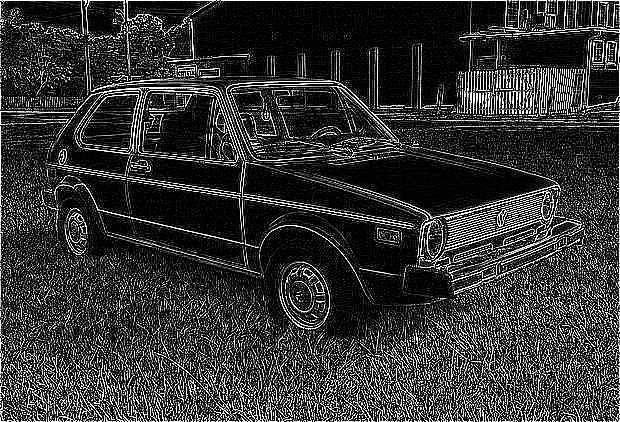

In [29]:
green_convolved = convolve(green_padded, kernel)
green_convolved_list = list(np.array(green_convolved).flat)
display_channel(green_convolved_list, width)

In [27]:
def PY_apply_simple_kernel_func(mat, w, kernel_funct):
    
    # determine height
    h=(int)(len(mat)/w)
    
    # list for convolution
    new_image = list()
    
    # slide window over matrix
    for i,g in enumerate(mat):
    
        # out of bounds?
        if i >= (w*(h-1)): 
            break
        if i!= 0 and (i+1) % w == 0:
            continue
        
        # grab window of pixels
        window = [mat[i], mat[(i+1)], mat[(i+w)], mat[(i+1+w)]]
        
        # apply function
        output = kernel_funct(window)
        
        # round half to even
        output = int(round(output))
        
        # add pixel to convolution
        new_image.append(output)
    return new_image

### recursify the simple pooling function

In [28]:
# "recursify" the function
def PY_recurse_pooling(mat, width, kernel_funct, recurse_cnt):
    m = mat
    w = width
    for i in range(recurse_cnt):    
        m = PY_apply_simple_kernel_func(m, w, kernel_funct)
        w = w - 1
    return m

### <u><i>max</i></u> pooling

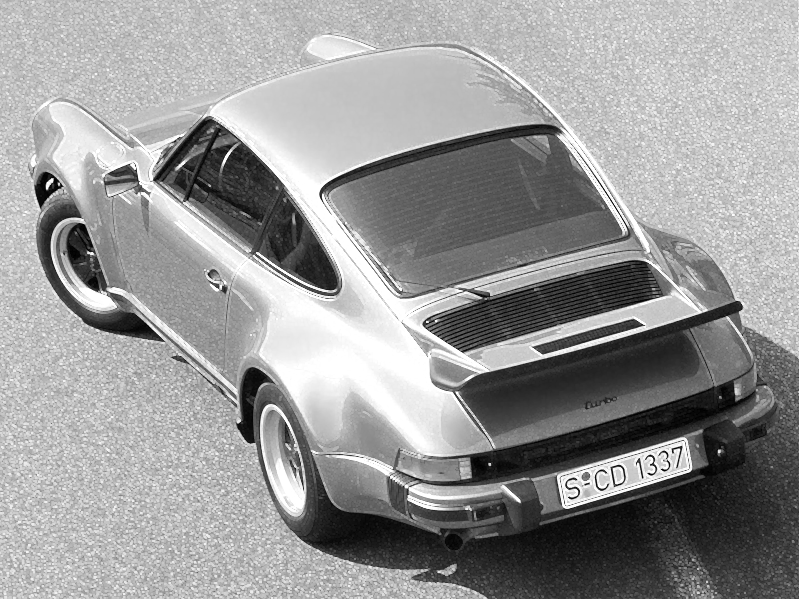

In [29]:
recurse_cnt = 1
green_pooled = PY_recurse_pooling(green, width, max, recurse_cnt)
display_channel(green_pooled, width - recurse_cnt)

### <i><u>mean</u></i> pooling x 10

83  seconds


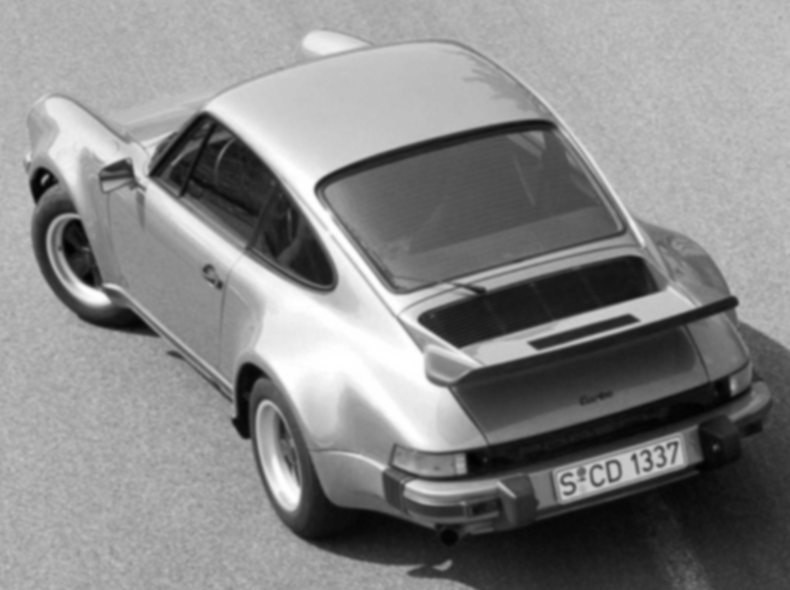

In [30]:
import numpy as np
import time

recurse_cnt = 10

start = time.time()
convolution = PY_recurse_pooling(green, width, np.mean, recurse_cnt)
print(round(time.time() - start), ' seconds')

display_channel(convolution, width - recurse_cnt)

# NEXT -  Pooling with C++

http://localhost:8888/notebooks/3_CPP_Convolution.ipynb

![raw](./imgs/pagani.jpg)